In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import cluster as clu
from sklearn import pipeline as pip
from sklearn import metrics as met
from sklearn import decomposition as dec
from sklearn import preprocessing as pre
from sklearn import manifold as man
from sklearn import compose as cmp
import plotly.graph_objects as go
from sklearn import impute as imp
import sklearn.neighbors as nn

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
longitude,20640,NaN,NaN,NaN,-119.57,2.00353,-124.35,-121.8,-118.49,-118.01,-114.31
latitude,20640,NaN,NaN,NaN,35.6319,2.13595,32.54,33.93,34.26,37.71,41.95
housing_median_age,20640,NaN,NaN,NaN,28.6395,12.5856,1,18,29,37,52
total_rooms,20640,NaN,NaN,NaN,2635.76,2181.62,2,1447.75,2127,3148,39320
total_bedrooms,20433,NaN,NaN,NaN,537.871,421.385,1,296,435,647,6445
population,20640,NaN,NaN,NaN,1425.48,1132.46,3,787,1166,1725,35682
households,20640,NaN,NaN,NaN,499.54,382.33,1,280,409,605,6082
median_income,20640,NaN,NaN,NaN,3.87067,1.89982,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640,NaN,NaN,NaN,206856,115396,14999,119600,179700,264725,500001
ocean_proximity,20640,5,<1H OCEAN,9136,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
X_train = df.drop(columns=["median_house_value"],axis=1)

In [112]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['median_house_value'],
        mode = 'markers',
        marker_color = df['median_house_value'],
        
        ))

fig.show()

In [109]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['median_house_value'],
        mode = 'markers',
        marker = dict(
            #size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'RdBu',
            cmin = 0,
            color = df['median_house_value'],
            cmax = df['median_house_value'].max(),
            colorbar_title="median_house_value"
        )))

fig.update_layout(
        #title = 'median_house_value)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

# Kmeans

In [5]:
num_list = list(X_train.select_dtypes("number").columns)
cat_list = list(X_train.select_dtypes(exclude="number").columns)

pipe_num = pip.Pipeline([
                        ("imp",imp.SimpleImputer(strategy="mean")),
                        ("scl",pre.StandardScaler()) 
                        ]) 

pipe_cat = pip.Pipeline([
                        ("ohe",pre.OneHotEncoder())
                        ]) 
preprocessor = cmp.ColumnTransformer([
                                      ("numimp",pipe_num,num_list),
                                      ("cat",pipe_cat,cat_list)],
                                      remainder="passthrough")



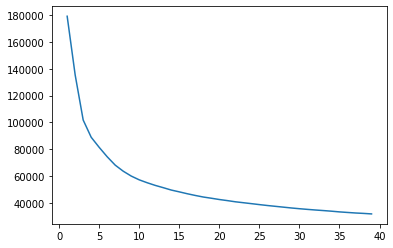

In [6]:
x_values = []
y_values = []
for i in range(1,40):
    pipe = pip.Pipeline([
                        ("pre",preprocessor),
                        ("clu",clu.KMeans(n_clusters=i,random_state=42))
                        ])
    pipe.fit(X_train)
    x_values.append(i)
    y_values.append(pipe.named_steps["clu"].inertia_)
plt.plot(x_values,y_values)
plt.show()


In [9]:
# 10 seems okay

In [7]:
pipe = pip.Pipeline([
                    ("pre",preprocessor),
                    ("clu",clu.KMeans(n_clusters=10,random_state=42))
                    ])
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numimp',
                                                  Pipeline(memory=None,
                                                           steps=[('imp',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                  

In [9]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = X_train['longitude'],
        lat = X_train['latitude'],
        text = pipe[1].labels_,
        mode = 'markers',
        marker = dict(
            #size = 8,
            #opacity = 0.5,
            reversescale = True,
            #autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'RdBu',
            cmin = 0,
            color = pipe[1].labels_,
            cmax = pipe[1].labels_.max(),
            colorbar_title="median_house_value"
        )))

fig.update_layout(
        title = 'Cluesters',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

# DBscan

In [21]:
num_list = list(X_train.select_dtypes("number").columns)
cat_list = list(X_train.select_dtypes(exclude="number").columns)

pipe_num = pip.Pipeline([
                        ("imp",imp.SimpleImputer(strategy="mean")),
                        ("scl",pre.StandardScaler()) 
                        ]) 

pipe_cat = pip.Pipeline([
                        ("ohe",pre.OneHotEncoder())
                        ]) 
preprocessor = cmp.ColumnTransformer([
                                      ("numimp",pipe_num,num_list),
                                      ("cat",pipe_cat,cat_list)],
                                      remainder="passthrough")

pipe = pip.Pipeline([
                    ("pre",preprocessor),
                    #("nn",nn.NearestNeighbors(n_neighbors=10,algorithm="auto"))
                    ])
pipe.fit(X_train)


Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numimp',
                                                  Pipeline(memory=None,
                                                           steps=[('imp',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                  

In [23]:
X_train_transformed = pipe.fit_transform(X_train)

In [50]:
nn_obj = nn.NearestNeighbors(n_neighbors=10,algorithm="auto")
nn_obj.fit(X_train_transformed)
output = nn_obj.kneighbors(X_train_transformed, return_distance=True)

In [44]:
X_train_transformed.shape

(20640, 13)

In [85]:
print("indices",output[0].shape)
print("distances",output[1].shape)

indices (20640, 10)
distances (20640, 10)


In [95]:
mean_distances = list(pd.DataFrame(output[0]).mean(axis=1).sort_values().values)
mean_indexes = list(pd.DataFrame(output[1]).index)
i = 0
for i in range(5):
    print(mean_indexes[i],mean_distances[i])


0 0.10264543081930286
1 0.10567474464272757
2 0.11372067157938162
3 0.11385334000649976
4 0.11482662404913731


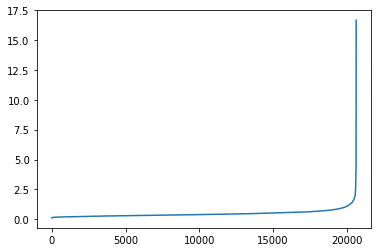

In [96]:
plt.plot(mean_indexes,mean_distances)
plt.show()

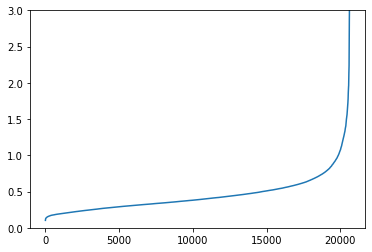

In [102]:
plt.plot(mean_indexes,mean_distances)
plt.ylim(0, 3)
plt.show()

In [103]:
# 1 seems to be fine

In [105]:
num_list = list(X_train.select_dtypes("number").columns)
cat_list = list(X_train.select_dtypes(exclude="number").columns)

pipe_num = pip.Pipeline([
                        ("imp",imp.SimpleImputer(strategy="mean")),
                        ("scl",pre.StandardScaler()) 
                        ]) 

pipe_cat = pip.Pipeline([
                        ("ohe",pre.OneHotEncoder())
                        ]) 
preprocessor = cmp.ColumnTransformer([
                                      ("numimp",pipe_num,num_list),
                                      ("cat",pipe_cat,cat_list)],
                                      remainder="passthrough")

pipe = pip.Pipeline([
                    ("pre",preprocessor),
                    ("clu",clu.DBSCAN(eps=1,min_samples=10))
                    ])
pipe.fit(X_train)


Pipeline(memory=None,
         steps=[('pre',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('numimp',
                                                  Pipeline(memory=None,
                                                           steps=[('imp',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                                                  

In [108]:
import plotly.graph_objects as go

import pandas as pd

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = X_train['longitude'],
        lat = X_train['latitude'],
        text = pipe[1].labels_,
        mode = 'markers',
        marker = dict(
            #size = 8,
            #opacity = 0.5,
            reversescale = True,
            #autocolorscale = False,
            #symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'RdBu',
            cmin = 0,
            color = pipe[1].labels_,
            cmax = pipe[1].labels_.max(),
            colorbar_title=""
        )))

fig.update_layout(
        #title = 'Cluesters',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()